# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

>This is prepared for Udacity Machine Learning Engineer Nanodegree online class  
>Author: jtmoogle @github.com     All Rights Reserved  
>Date: July 2, 2017

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several *supervised algorithms* of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

>The following steps were performed
1. Exploring the Data 
    + Implementation: Data Exploration
2. Preparing the Data
    + Transforming Skewed Continuous Features
    + Normalizing Numerical Features
    + Implementation: Data Preprocessing
    + Shuffle and Split Data
3. Evaluating Model Performance
    + Metrics and the Naive Predictor
    + Naive Predictor Performance
    + Supervised Learning Models
    + Model Application
    + Implementation - Creating a Training and Predicting Pipeline
    + Implementation: Initial Model Evaluation
4. Improving Results
    + Choosing the Best Model
    + Describing the Model in Layman's Terms
    + Implementation: Model Tuning
    + Final Model Evaluation
5. Feature Importance
    + Feature Relevance Observation
    + Implementation - Extracting Feature Importance
    + Extracting Feature Importance
    + Feature Selection
    + Effects of Feature Selection

----
## 1. Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [83]:
#1-------------
# Import libraries necessary for this project
import sys 
from platform import python_version
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

#FYI only
debug=False; fyi=True;

# Pretty display for notebooks
%matplotlib inline

display( '-sys version->', sys.version_info )
display( '-python version->', python_version())

# Load the Census dataset
data = pd.read_csv("census.csv")

print( '-debug mode->', debug, '   -fyi mode->', fyi)
if debug: display('-Data dtype->', data.dtypes)
if fyi: 
    display('-Data column->', data.columns.tolist())
    display('-Data summary->', data.describe())

# Success - Display the first record
display('-Data first record->', data.head(n=1))
display('-Data last record->', data.tail(n=1))

'-sys version->'

sys.version_info(major=3, minor=6, micro=0, releaselevel='final', serial=0)

'-python version->'

'3.6.0'

-debug mode-> False    -fyi mode-> True


'-Data column->'

['age',
 'workclass',
 'education_level',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

'-Data summary->'

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


'-Data first record->'

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


'-Data last record->'

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45221,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [84]:
#2-------------
# Total number of records
n_records, n_cols = data.shape
if debug: print('-Data size->', n_records, n_cols)

# Number of records where individual's income is more than $50,000
# assume TRUE is >=50K, sume of (int(True) = 1    int(False)= 0) 
#   equivalent to len( data[data.income == '>50K'] ) ) 
n_greater_50k = np.sum(np.int64((data.income == '>50K'))) 

# Number of records where individual's income is at most $50,000
n_at_most_50k = np.sum(np.int64(data.income == '<=50K'))

# Percentage of individuals whose income is more than $50,000
# equivalent to 100*n_greater_50k/n_records
greater_percent = np.divide( np.multiply(100, n_greater_50k), n_records)

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## 2. Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

"-Data ['capital-gain', 'capital-loss'] Skewed summary->"

,capital-gain,capital-loss
count,45222.000000,45222.000000
mean,1101.430344,88.595418
std,7506.430084,404.956092
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,4356.000000


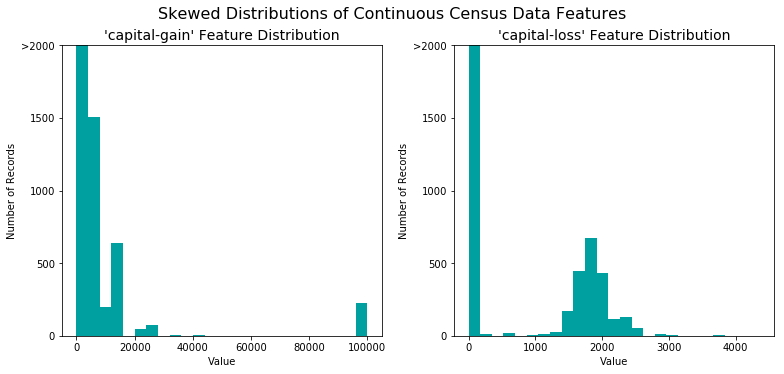

In [85]:
#3-------------
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

skewed = ['capital-gain', 'capital-loss']
display('-Data {} Skewed summary->'.format(skewed), data[skewed].describe())

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

'-Feature Skewed summary->'

,capital-gain,capital-loss
count,45222.000000,45222.000000
mean,0.740759,0.355489
std,2.466527,1.595914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,11.512925,8.379539


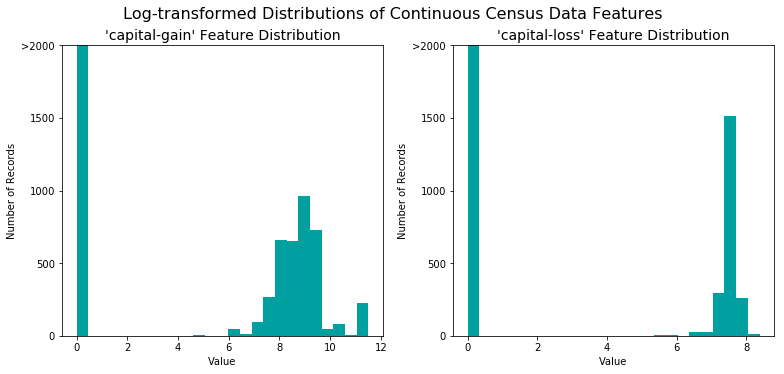

In [86]:
#4-------------
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))
display('-Feature Skewed summary->', features_raw[skewed].describe())

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [87]:
#5-------------
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(features_raw[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [89]:
#6-------------
## To encode the categorical labels as numeric data
# One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies( features_raw )
if debug: display ("-features=get_dummiesfeatures_raw ->", features.head(n=1))

# Encode the 'income_raw' data to numerical values "<=50K" to 0 and records with ">50K" to 1.
mapping_dict = { "income": { "<=50K": 0, ">50K": 1 } }
income = pd.DataFrame(income_raw)
income = income.replace(mapping_dict)
display("-income_raw->", income_raw.tail(n=6))
display("-income->", income.tail(n=6))

# Print the number of features after one-hot encoding
encoded = list( features.columns) 
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
if debug: print (encoded)
else: display(encoded[:6], '...')


'-income_raw->'

45216    <=50K
45217    <=50K
45218    <=50K
45219    <=50K
45220    <=50K
45221     >50K
Name: income, dtype: object

'-income->'

,income
45216,0
45217,0
45218,0
45219,0
45220,0
45221,1


103 total features after one-hot encoding.


['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov']

'...'

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [90]:
#7-------------
# Import train_test_split
#from sklearn.cross_validation import train_test_split  with older python version
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into 80% for training and 20% for testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 99)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## 3. Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows *individuals that make more than \$50,000 are most likely to donate to their charity*. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore,  
-  A model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. 
- We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performance
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [91]:
#8-------------
#Note:  T=true P=postive F=false N=negative 
#TP = people income more than (>) 50k 
#FP = people income at most (=<) 50k

## Calculation 
# Accuracy = (TP+TN)/(TP+FP+TN+FN)
# Precision = TP/(TP+FP)
# Recall = TP/(TP+FN)
# F-beta score = ( 1+beta**2) * (Recall * Precision) / ((beta**2 * Precision) + Recall)

# Calculate accuracy = (TP+TN)/(TP+FP+FN+TN)
# earlier calculated greater_percent = 100*n_greater_50k/n_records, 
# so accuracy = greater_percent / 100
accuracy = np.divide( greater_percent, 100.0)

# naive model: all people make more than (>) 50k income
PosVal=1
pred = np.asarray( [PosVal] * n_records) 

TP = n_greater_50k # "True Positive" (income is >= 50K and pred = 1) prediction
TN = 0             # "True Negative" (income is >= 50K and pred = 0) prediction 
FP = n_at_most_50k # "False Positive" ((income is not >= 50K and pred = 1) predictions 
FN = 0             # "False Negative" (income is not >= 50K, pred = 0) Never predict a person making less than 50K

precision = TP/(TP+FP)
#precision = np.divide( TP, np.add( TP, FP))
recall = TP/(TP+FN)
#recall = np.divide( TP, np.add( TP, FN))
print ("Naive Predictor: [Precision: {:.4f}, Recall: {:.4f}]".format(precision, recall))

# Calculate F-score using the formula above for beta = 0.5
#F-beta score = ( 1+beta**2) * (Recall * Precision) / ((beta**2 * Precision) + Recall)
beta = 0.50
beta_squared = beta ** 2
fscore = (1 + beta_squared) * (recall*precision)/((beta_squared * precision) + recall)

# if using numpy, fscore = np.multiply(np.add(1, beta_squared), 
#                    np.divide( np.multiply(recall, precision),
#                              np.add((beta_squared * precision), recall)))

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Precision: 0.2478, Recall: 1.0000]
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


>**Answer** Naive Predictor:     Accuracy score: 0.2478    F-score: 0.2917

Note:
>The people who make more than 50k is most likely will donate to charityML.  
This naive prediction model has possible outcomes in the following table 
- True - predict that everyone/all who make **more than (>) 50k income**
- False - predict that everyone/all who make at most (<=) 50k income
- Positive - label "1" if people **actually** make more than (>) 50k
- Negative - label "0" if people actually make at most (<=) 50k  

>|income is '>50K' | prediction = 1 | result count | 
| :---: | :---: |  :---: | 
| True | Positive | n_greather_50k |
| True | Negative | zero | 
| False | Positive | n_at_most_50k | 
| False | Negative | zero | 

>| gold labels | income>50k | income <= 50K | Note |  
|  :---: | :---: |  :---: | :---: |  
| System output| True Positive (n_greather_50k)| False  Positive (n_at_most_50k) |precision = TP/(TP + FP)|  
| income>50K | False Negative (zero) | True Negative (zero) | 
| income <=50K|recall = TP/(TP + FN) | |accuracy = (TP + TN)/(TP + FP + TN + FN)|  

###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

>**Answer: **  
First, let's look at data we had 
- 45,222 records in total
- Skewed data: 
    + 24.78% (11,208/total 45,222) individuals making more than (>) \$50K  
    + 75.22% (34,014/55,222) making at most (<=) \$50k
- Possibility if splitting data: training or Test data could contain most of >50K, or vice versa.  
    + Training set has 36,177 samples; testing set has 9,045 samples.
- Noticed too many features: 103 total features after one-hot encoding

> I used the following references and cited for strength and weakness (pros cons) below
- [Comparing supervised learning algorithms](http://www.dataschool.io/comparing-supervised-learning-algorithms/)  
- [scikit-learn algorithm chat - Choose the right estimator](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) 

> To choose the appropriate models that I would test on the census data.  
A. Logistic Regression  
B. Random Forest  
C. K-Nearest Neighbors (KNeighbors)  

A. Logistic Regression - widely used for 'classification' problem type when the outcome/response I want to predict/measure is categorized with two/many levels. (i.e. gender, outcome of a game match, outcome of next president election, etc.)   
>+ Real-world application: 
    + in modern tool: text processing, remote sensing
    + in medical specialty: disease diagnostics
    in marketing/economy: credit scoring; measuring the success rates of marketing campaigns, predicting the revenues of a certain product etc.
    + application reference: 
        + [A humanitarian logistics model developed by the Center for Latin American Logistics Innovation (CLI)](http://supplychainmit.com/2014/12/11/a-real-world-humanitarian-logistics-model/) improves the efficiency of response efforts by taking a holistic view of these operations"
        + [Credit Score What It is and How it is developed](http://dni-institute.in/blogs/credit-score-what-is-it-and-how-is-it-developed/) used to validate various approval process before finally deployed in credit decision system.
+ Strength: simple, fast training speed, fast prediction speed, efficient for small dataset with limited features, suitable for almost all applications where decision trees are used. 
+ Weakness: lower average predictive accuracy, not flexible enough/challenge to capture complex relationship in data, require the effort to avoid under fitting or over fitting such as fine tune of feature population and selection, multiple or non-linear decision boundaries
+ Reason being good candidate: capable to deal with many features which need to be correlated.  Regularization to prevent over fitting due to dataset having many features    

B. Random Forest - suitable for Regression or Classification problem type
>+ Real-world application: be used to model the impact of marketing on customer acquisition, retention; churn or to predict disease risk and susceptibility in patients.    
    + application reference: 
        + [Ensemble Methods: Netflix prize, BellKor's Pragmatic Chaos]( http://blog.udacity.com/2016/06/machine-learning-everywhere-netflix-personalized-medicine-fraud-prevention.html) improve the accuracy of predictions about how much someone is going to enjoy a movie based on their preferences. (Sept 2009)  
        + [Application of Random Forest to Aircraft Engine Fault Diagnosis](http://ieeexplore.ieee.org/abstract/document/4281698/?reload=true) was applied to aircraft engine fault diagnosis in an attempt to achieve more accurate and reliable classification performance.  
+ Strength: higher average predictive accuracy, run efficiently on large data bases, easily to handle categorical variables, some amount parameters tuning needed, auto learn feature interactions
+ Weakness: slow training speed, moderate prediction speed, no perform well on small number of observation, difficult to interpret/explain to others, over fit if there are noisy, less accurate compared to boosting models. 
+ Reason being good candidate: We can train fast, can tune and not to over fit too much, dataset size is large, capable to deal with numerical and categorical data, no need to change categorical data to numerical

C. K-Nearest Neighbors (KNeighbors) - suitable for Regression or Classification predictive problem type, search applications where you are looking for “similar” items; that is, when your task is some form of “find items similar to this one”. 
>+ Real-world application: concept search
    + To detect pattern in credit card usage in retail stores - analyze register data and spot unusual patterns indicating suspicious activity  
    + theft prevention in retail business  
    + application reference  
        + [Electronic discovery](https://en.wikipedia.org/wiki/Electronic_discovery/)  
        + [kCura’s Relativity](https://www.kcura.com/relativity/Portals/0/Documents/8.0%20Documentation%20Help%20Site/index.htm#Site%20Resources/Features.htm)  
        + [Recommender Systems](https://en.wikipedia.org/wiki/Recommender_system)   
        + [Herta Security](http://www.hertasecurity.com/en/)  
+ Strength: fast training speed, prediction speed (depend on n), has no model other than storing entire dataset, so no learning in required
+ Weakness: lower average predictive accuracy, minimum parameters tuning needed, no perform well with small number of observation, no handle lots of irrelevant features well, features might need scaling
+ Reason being good candidate: efficiently store the data using complexity if data size is smaller

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [92]:
#9-------------
from sklearn.metrics import  fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    debug=False
    if debug: 
        print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
        display(learner)
        
        
    results = {}

    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit( X_train[:sample_size], y_train[:sample_size] )
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = np.float(end - start)
        
    # Get the predictions on the test set, 
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict( X_test ) 
    predictions_train = learner.predict( X_train[:300] )
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = np.float(end - start)
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train, normalize=True)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test, normalize=True)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score( y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score( y_test, predictions_test, beta=0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results


### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

'total count of y_train = 36177'

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


'--results of learners->'

LogisticRegression


,1%,10%,100%
acc_test,0.823217,0.844997,0.847540
acc_train,0.863333,0.840000,0.853333
f_test,0.643844,0.692575,0.697076
f_train,0.662100,0.591398,0.627119
pred_time,0.015600,0.011001,0.015600
train_time,0.000000,0.036601,0.431003


RandomForestClassifier


,1%,10%,100%
acc_test,0.805086,0.838917,0.844113
acc_train,0.990000,0.993333,0.966667
f_test,0.591598,0.677256,0.687375
f_train,0.989399,0.983051,0.907591
pred_time,0.031200,0.031200,0.046800
train_time,0.015600,0.062400,0.717601


KNeighborsClassifier


,1%,10%,100%
acc_test,0.795246,0.811498,0.831841
acc_train,0.903333,0.880000,0.883333
f_test,0.565725,0.613435,0.658903
f_train,0.756014,0.689655,0.698413
pred_time,0.546001,4.711208,32.434457
train_time,0.000000,0.015600,2.152804


F:\_githup\submitted\finding_donors\visuals.py:75: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ax[j/3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
F:\_githup\submitted\finding_donors\visuals.py:76: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ax[j/3, j%3].set_xticks([0.45, 1.45, 2.45])
F:\_githup\submitted\finding_donors\visuals.py:77: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ax[j/3, j%3].set_xticklabels(["1%", "10%", "100%"])
F:\_githup\submitted\finding_donors\visuals.py:78: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ax[j/3, j%3].set_xlabel("Training Set Size")
F:\_githup\submitted\finding_donors\visuals.py:79: VisibleDeprecationWarning: using a non-in

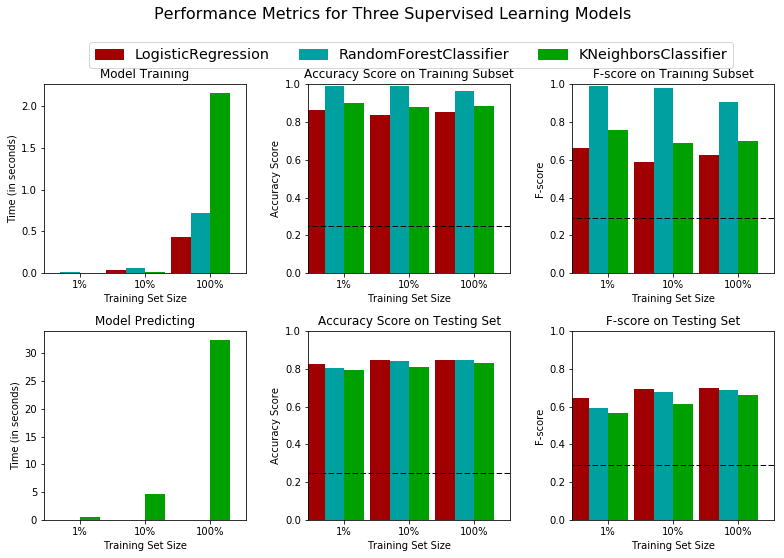

In [95]:
#10-------------
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize the three models
clf_A = LogisticRegression(random_state=99)
clf_B = RandomForestClassifier(criterion="entropy", random_state=99)
clf_C = KNeighborsClassifier(n_neighbors=5)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
cnt = len(y_train)
display("total count of y_train = {}".format(cnt))
samples_1 = np.int( cnt * 0.01 )
samples_10 = np.int( cnt * 0.1 )
samples_100 = np.int( cnt * 1.0 )

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        try:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())
            if debug: print ("Successfully fit a model!")    
        except:
            print ("Something went wrong with train_predict a model.")
            
if fyi: 
    display('--results of learners->')
    for i in results.items():
        print (i[0])  
        display(pd.DataFrame(i[1]).rename(columns={ 0:'1%', 1:'10%', 2:'100%' }))
    
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)


----
## 4. Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

>**Answer: **  
From my observation, both 10% sample and 100% sample diagrams looked similar.  
If comparing the computed result, the <b>bolded</b> number was the best in the column

>| Model | Sample | (Highest) Accuracy Rate | (Highest) F beta score | (Least Time) Performance |
|  :---: | :--: | :---: | :---: | :---: |
| <b>Calculated Result</b> | <b>Size</b> | <b>acc_train/acc_test</b> | <b>f_traing/f_test</b> | <b>train_time/pred_time </b> | 
| Logistic Regression | 10%<br>100% |  0.84/<b>0.845</b><br>0.8533/<b>0.8475</b> | 0.5914/<b>0.6926</b><br>0.6271/<b>0.697</b> | <b>0.037</b>/<b>0.011</b><br><b>0.431/0.0156</b> |
| Random Forest Classifier | 10%<br>100% |<b>0.9933</b>/0.8389<br><b>0.9667</b>/0.8441 | <b>0.9831</b>/0.6773<br><b>0.9076</b>/0.6874 | 0.0624/0.0312<br>0.7176/0.0468 |
| K Neighbors Classifier | 10%<br>100% |0.88/0.8115<br>0.8833/0.8318 | 0.6897/0.6134<br>0.6984/0.6589 | 0.0156/ 4.7112<br> 2.1528/32.4345 |  

>- Accuracy rate - the higher the better 
    + Training: <b>Random Forest accuracy score</b> > Logistic Regression  > KNN
    + Testing/Prediction: <b>Logistic Regression accuracy score</b> > Random Forest > KNN
    + Difference between Random Forest and Logistic Regression was slight on test set
    + The more data the better accuracy on prediction on Logistic and Random Forest. 
- F beta score if beta=0.5 - the higher the better  
    + Training: <b>Random Forest F score</b> > Logistic Regression > KNN
    + Testing/Prediction: <b>Logistic Regression F score</b> > Random Forest > KNN
    + Difference between Random Forest and Logistic Regression was slight on test set
    + The more data the better F beta score on prediction on Logistic. 
- Performance - the less the better  
    + Training & Prediction: <b>Logistics Regression time taken</b> < Random Forest Classifier < KNN
    + K Neighbors Classifier time taken was slowest, longest computing time

> My consideration included the following 
    - Random Forest has the best accuracy score and f score on training set
    - Logistic Regression has the best accuracy score and f score on test set
    - Logistic Regression has the best performance on training and prediction
Consequently, comparing Random Forest Classifier and Logistic Regression, the result displayed Logistic Regression is slightly worse than Random Forest. 
If looking at predictive performance, slight tuning of Logistic Regression's model would easily yield much better predictive performance compare to Random Forest.  

>Therefore, I would choose the **Logistic Regression** model as the most appropriate for the task of identifying an individual that make more than $50k income  


In [96]:
#Compute precision, recall, F-measure and support for each class
from sklearn.metrics import precision_recall_fscore_support
#Build a text report showing the main classification metrics
from sklearn.metrics import classification_report

for clf in [clf_A, clf_B, clf_C]:
    display ('-- {} Classification report -->'.format(clf.__class__.__name__))
    if debug: display ( precision_recall_fscore_support(y_test == 1, clf.predict(X_test)))
    print (classification_report(y_test == 1, clf.predict(X_test)))

'-- LogisticRegression Classification report -->'

             precision    recall  f1-score   support

      False       0.88      0.92      0.90      6833
       True       0.72      0.61      0.66      2212

avg / total       0.84      0.85      0.84      9045



'-- RandomForestClassifier Classification report -->'

             precision    recall  f1-score   support

      False       0.88      0.92      0.90      6833
       True       0.71      0.62      0.66      2212

avg / total       0.84      0.84      0.84      9045



'-- KNeighborsClassifier Classification report -->'

             precision    recall  f1-score   support

      False       0.88      0.90      0.89      6833
       True       0.67      0.61      0.64      2212

avg / total       0.83      0.83      0.83      9045



### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

>**Answer: **  “Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a [logistic function](https://en.wikipedia.org/wiki/Logistic_function)” - Wikipedia 

> The Logistic regression model would not try to predict the numeric value of the given inputs, instead, it would output a probability that the given input value mapping to a certain class.  
- It is used to find the probability of event if Success and if Failure when the dependent feature is binary output indicating 0/1, True/False, Yes/No.  
- The value of the output variable (Y) ranges should be from 0 to 1.   The output of Logistic Regression always would lie in [0, 1].
- Using log transform the distribution to the predicted odd ratio.  
- It would learn by using weights and a classification function.
- Highlight
    + To avoid over fitting and under fitting, we should include all significant variables. A good approach to ensure this practice is to use a step wise method to estimate the logistic regression
    + More powerful to maximum likelihood estimates for large sample sizes
    + The independent variables should not be correlated with each other i.e. no multi col linearity.  However, we have the options to include interaction effects of categorical variables in the analysis and in the model.
    + If the values of dependent variable is ordinal, then it is called as Ordinal logistic regression
    + If dependent variable is multi class then it is known as Multinomial Logistic regression.

Using example of CharityML understood an individual's income would help a non-profit organization better understand how large of a donation to request, or if they should reach out to begin with.

> Suppose we would like to predict an individual who makes more than 50K income or Not.  
We would observe the similar kind of features described in [census income data data](https://archive.ics.uci.edu/ml/datasets/Census+Income) to 'predict the likelihood occurrence of an event' (an individual makes >50K income).  For example, 
    + Age: Probabilities younger people usually having less experience/skill than older people, would have high chance of finding less-paying jobs
    + Capital Gain: Probabilities people owning higher capital gain would have high chances earning more income to save even to buy more capital properties.   
    + Education level or Education number: Probabilities people with higher education would have high chances of finding high-paying jobs

> If we would want to build a logistic regression model based on above similar features to predict the **likelihood occurrence** of an individual makes >50k income or <=50K on its observations. 
- First, split the data distribution into 80% for training dataset, 20% for testing dataset.  
- Next, we would use these features from training dataset as input parameters to *train the logistic regression model*.  See observation x1, x2, x3...
    + *The model would calculate the weights over the training data.  Later the model will predict using weights for the new observation*
- Later, the *trained logistic regression model* would predict if people make >50K for new observations    

> <u>CharityML Data Table</u>  

>|Observation| input: Age | input: education level | target: income | 
|--|--|--|
| x1| 19 | 11th | <=50K |
| x2| 32 | Some-college | >50K | 
| x3| 51 | Bachelors | >50K |
| x4| 40 | HS-grad | <=50K | 

> Since it's not possible to use above categorical data to build the logistic regression, the above data needs to convert into score, weights and the corresponding target.  
- Score: numerical equivalent to feature categorical value.
- Weights: more like weightages corresponding to the particular target 
- Target class: an individual who makes income >50K and <=50K.  
If we were using the logistic regression model for predicting, the binary targets would be like 1/yes or 0/no, known as the Binary classification.

> <u>Updated CharityML Data Table</u> 

>|inputs | score | weights | target | target description |
|--|--|---|---| -- | 
|x1 | 6 | -0.7| 0| <=50 |
|x2 | 5 | 0.4| 1 | >50k |
|x3 | 7 | 0.6 | 1 | >50k |
|x4 | 3 | -0.2|0  | <= 50k |

> In this case, if we pass x3 observation (age 51, Bachelors) to the model to get the probability 
- Corresponding score was 7, for others the scores were 6,5, 3
- Weights 0.6 was meant to say the model is 60% confident will be >50K  
In fact, we could predict whether the people make >50K or <=50K, we just need to multiply the score and corresponding weight to get the score.  
The calculated score was also known as the logits.  The model output would be like 
    - if the logit was greater than (>) 0, the target class indicated an individual who makes >50K
    - if the logit was less than (<) 0, the target class was an individual who makes <=50K.  


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [97]:
#11-------------
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV    # older python version
#from sklearn.model_selection import GridSearchCV  # newer python version
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
clf = LogisticRegression( random_state=99)

# Create the parameters list you wish to tune
parameters = {'solver':['liblinear','lbfgs','newton-cg' ],
              'C':[0.8, 8.0, 80.0], 
              'random_state': [None, 9, 99] }

# Make an fbeta_score scoring object
scorer = make_scorer( fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV( clf, param_grid=parameters,scoring=scorer)
if debug: display(grid_obj)
# Fit the grid search object to the training data and find the optimal parameters
if debug: print(X_train.shape, y_train.shape)
grid_fit = grid_obj.fit(X_train, y_train.values.ravel())

# Get the estimator
best_clf = grid_fit.best_estimator_
if debug: display(best_clf)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train.values.ravel())).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
    

Unoptimized model
------
Accuracy score on testing data: 0.8475
F-score on testing data: 0.6971

Optimized Model
------
Final accuracy score on the testing data: 0.8478
Final F-score on the testing data: 0.6975


In [98]:
print ("\nUnoptimized model parameters->", clf)
print ("\nOptimized model Best parameters->", best_clf)


if fyi:
    print("\n--summary difference -->")
    print("Accuracy on testing data difference (optimized - unoptimized) --> {:.4f} --> {:.2f}% of unoptimized ".format(
       accuracy_score(y_test, best_predictions) - accuracy_score(y_test, predictions),
    100*(accuracy_score(y_test, best_predictions) - accuracy_score(y_test, predictions))
       /accuracy_score(y_test, predictions) 
    ))
    print ("F-score  on testing data difference (optimized - unoptimized) --> {:.4f} --> {:.2f}% of unoptimized ".format(
    fbeta_score(y_test, best_predictions, beta = 0.5) - fbeta_score(y_test, predictions, beta = 0.5),
    100*(fbeta_score(y_test, best_predictions, beta = 0.5) - fbeta_score(y_test, predictions, beta = 0.5)) 
         /fbeta_score(y_test, predictions, beta = 0.5)
    ))


Unoptimized model parameters-> LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=99, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Optimized model Best parameters-> LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

--summary difference -->
Accuracy on testing data difference (optimized - unoptimized) --> 0.0002 --> 0.03% of unoptimized 
F-score  on testing data difference (optimized - unoptimized) --> 0.0005 --> 0.07% of unoptimized 


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

>**Answer: **  
Results: 
- Naive predictor Accuracy score 0.2478 F-score for simplicity 0.2917 was used as Benchmark 
- My chosen model was logistic regression and tuned with 'solver', 'C', and 'random_state' parameters.
- Difference was optimized value - unoptimized value
- Difference % was difference value divided by unoptimized value

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |Difference | Difference % |
|:---:  |:---:  |:---:  | :---: | :---: |:---: |
| Accuracy Score |  0.2478 | 0.8475  | 0.8478 | 0.0002 |0.03% |
| F-score        |  0.2917 | 0.6971  | 0.6975 |0.0005 | 0.07%|

>Comparison
+ Optimized model has the best accuracy score 0.8478 > Unoptimized 0.8475 > Benchmark 0.2478
    + Slight improvement from unoptimized to unoptimzed model
    + Significant improvement from benchmark predictor to optimized model
+ Optimized model has the best F-score 0.6975 > Unoptimized 0.6971 > Benchmark 0.2917
    + Slight improvement from unoptimized to unoptimzed model
    + Significant improvement from benchmark predictor to optimized model

>The optimized model has significantly better accuracy and F-score scores compared to the benchmark predicator (of naive all positive model).


----
## 5. Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

In [99]:
display('--{} data columns --> '.format(features_raw.shape[1]), features_raw.columns.tolist())

'--13 data columns --> '

['age',
 'workclass',
 'education_level',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

>**Answer:**  I would choose and rank the following with 1 for the most important, 5 for the least important for prediction  
1. capital-gain: Probabilities people owning higher capital gain would have high chances earning more income to save even to buy more capital properties.   
2. occupation: Probabilities high tech occupation usually high chance getting high-paying jobs
3. age: Probabilities younger people usually having less experience/skill than older people, would have high chance of finding less-paying jobs
4. education_level: Probabilities people with higher education would have high chances of finding high-paying jobs
5. sex: Probabilities males have better initial salary, and promotion faster than female.  Male get more income


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.


--Full Feature Training Time--> 0.7080


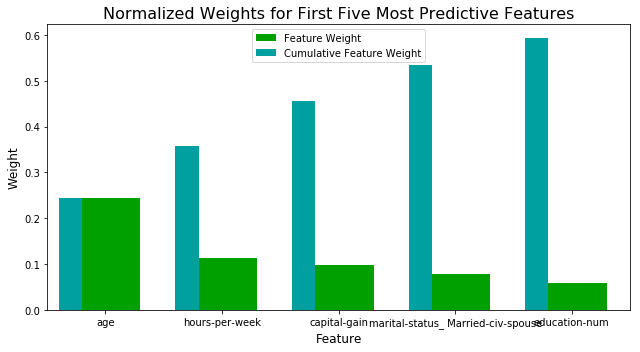


-- First 20 of Top 10 important features -->  


,importances,features
0,0.243544,age
4,0.113718,hours-per-week
2,0.0984859,capital-gain
30,0.0790893,marital-status_ Married-civ-spouse
1,0.0586236,education-num
32,0.0408817,marital-status_ Never-married
3,0.0364723,capital-loss
50,0.0229548,relationship_ Not-in-family
44,0.0180429,occupation_ Prof-specialty
61,0.0156957,sex_ Male


In [100]:
#12-------------
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

feature_results={} # feature importance selection result
# Train the supervised model on the training set 
start = time()
clf =  RandomForestClassifier(criterion="entropy", random_state=99)
model=clf.fit(X_train, y_train.values.ravel() )
end = time()
feature_results['train_time_allfeature'] = np.float(end - start)  # Calculate the training time
print ("\n--Full Feature Training Time--> {:.4f}".format( feature_results['train_time_allfeature']))

# Extract the feature importances
importances = np.array(model.feature_importances_ )
if debug: display('--importances-->', importances)

# Plot
vs.feature_plot(importances, X_train, y_train.values.ravel() )

if fyi: 
    top_features = pd.DataFrame(data = np.array([importances.astype(float), features.columns]).T,
                       columns = ['importances', 'features'])
    top_features = top_features.sort_values('importances', ascending=False)
    print( "\n-- First 20 of Top 10 important features -->  ")
    display(top_features[:20])


### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

>**Answer:**
From visualization, the Random Forest Classifier depicted top 5 most relevant features.  

>| Rank (1-Highest Weight) | Feature Importance | My Initial Thought |  
| -- | --- | ---|
| 1| age | captain-gain |  
| 2| hours-per-week | occupation |  
| 3| capital-gain | age |  
| 4| marital-status Married-civ-spouse | education level |  
| 5| education number | sex |  

> Comparing with my initial thought top 5 features, which I considered relevant previously, was partially (3/5) matched: expect age, captain-gain, and education related being important top 5 features, but I didn't expect hours-per-week and marital-status in top 5 features.
- If you were close to the same answer, how does this visualization confirm your thoughts?  
     - The visualization confirmed my thoughts about age, captain-gain, and education related (not number, but level)   But, married status and hours per week were not in my initial thought.  
     - My rank order was different from visualization was capital-gain > age > education level 
     - The rank based on the feature weights in visualization was age > capital-gain > education number
- If you were not close, why do you think these features are more relevant?  
I didn't expect hours-per-week and marital-status showing relevant top 5 features in visualization.  My previous consideration were occupation and sex (gender).  I thought occupation with high tech/skill having high chance getting high-pay jobs.  Sex- male had high chance to get more salary and promotion opportunity than female.
    - From reported relevant features in visualization 
        - (1) married status such as married with civilization spouse having more chance getting higher income
        - (2) hours-per-week such as 40 hours could imply people who make fixed income, assume not high-paying income

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [102]:
#13-------------
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
start = time() # get start time
clf = (clone(best_clf)).fit(X_train_reduced, y_train.values.ravel())
end = time()   # get end time
feature_results['train_time_reducedfeature'] = np.float(end - start)  # Calculate the training time
feature_results['time_saved'] = np.float(
    feature_results['train_time_reducedfeature']-feature_results['train_time_allfeature'])
    
# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print ("Final Model trained on full data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print ("Full Data Training Time: {:.4f} ".format( np.float(feature_results['train_time_allfeature']) ))

print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))
print ("Reduced Data Training Time: {:.4f} ".format( np.float(feature_results['train_time_reducedfeature'])))


if fyi:
    print("\n--summary difference -->")
    print("Accuracy on testing data difference (full-reduced) --> {:.4f} --> {:.2f}% of full data ".format(
       accuracy_score(y_test, best_predictions) - accuracy_score(y_test, reduced_predictions),
    100*(accuracy_score(y_test, best_predictions) - accuracy_score(y_test, reduced_predictions))
       /accuracy_score(y_test, best_predictions) 
    ))
    print ("F-score  on testing data difference (full-reduced) --> {:.4f} --> {:.2f}% of full data ".format(
    fbeta_score(y_test, best_predictions, beta = 0.5) - fbeta_score(y_test, reduced_predictions, beta = 0.5),
    100*(fbeta_score(y_test, best_predictions, beta = 0.5) - fbeta_score(y_test, reduced_predictions, beta = 0.5)) 
         /fbeta_score(y_test, best_predictions, beta = 0.5)
    ))
    print ("Time Gained/Saved --> {:.4f} --> {:.2f}% of full data time  ".format( feature_results['time_saved'], \
       100*(feature_results['time_saved'] / feature_results['train_time_allfeature']) ) )
    

Final Model trained on full data
------
Accuracy on testing data: 0.8478
F-score on testing data: 0.6975
Full Data Training Time: 0.7080 

Final Model trained on reduced data
------
Accuracy on testing data: 0.8303
F-score on testing data: 0.6580
Reduced Data Training Time: 0.0936 

--summary difference -->
Accuracy on testing data difference (full-reduced) --> 0.0175 --> 2.06% of full data 
F-score  on testing data difference (full-reduced) --> 0.0396 --> 5.67% of full data 
Time Gained/Saved --> -0.6144 --> -86.78% of full data time  


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

>**Answer:**  
Both final model's accuracy and F-score (full data in question 5) were slightly lower/decreased on the reduced (only top 5 most important) features.  
- Accuracy score, was decreased from full to reduced data
- F-Score, went down from full to reduced data
- Training time of reduced data gained/saved was decreased
- Difference was full data - reduced data
- Difference % was difference value divided by full data

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model<br>Full Features | Reduced Features | Difference | Difference % |
| :------------: | :-----------------: | :---------------: | :-------------: | :-------------: | -- | -- |
| Accuracy Score |  0.2478 | 0.8475  | <b>0.8478</b> | <b>0.8303</b>| <b>0.0175</b> |<b>2.06% of full data</b> |
| F-score        |  0.2917 | 0.6971  | <b>0.6975</b> | <b>0.6580</b> | <b>0.0396</b> |<b>5.67% of full data</b> |
| Time Taken | NA | NA | <b>0.7080 | <b>0.0936</b>  |<b>-0.6144</b>  | <b>-86.78% of full data time</b>|


> If training time was a factor, I would consider to reduce the data since time could save upto 86% of full data taken.  
Another possible factor would be if full data was too large, machine CPU is less capacity/power, I would still consider to reduce data.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

**Reference:** 
- [A Tour of Machine Learning Algorithms](http://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/)
- [Census Income Data Set](https://archive.ics.uci.edu/ml/datasets/Census+Income) 
- [Concept searching](https://www.kcura.com/relativity/Portals/0/Documents/8.0%20Documentation%20Help%20Site/Content/Features/Analytics/Concept%20searching.htm)
- [Ensemble learning](https://en.wikipedia.org/wiki/Ensemble_learning)
- [Ensemble Methods Application - Netflix Prize](http://www.netflixprize.com)
- [F1 score wiki](https://en.wikipedia.org/wiki/F1_score)
- [How the Logistic Regression Model Works in Machine Learning](https://dataaspirant.com/2017/03/02/how-logistic-regression-model-works/)
- [How PayPal beats the bad guys with machine learning](http://www.infoworld.com/article/2907877/machine-learning/how-paypal-reduces-fraud-with-machine-learning.html)
- [logistic function - Wikipedia](https://en.wikipedia.org/wiki/Logistic_function)
- [Logistic Regression](http://dni-institute.in/blogs/category/logistic-regression)
- [Logistic Regression wiki](https://en.wikipedia.org/wiki/Logistic_regression)
- [Logistic Regression for dummies](https://codesachin.wordpress.com/2015/08/16/logistic-regression-for-dummies/)
- [Logistic Regression for Machine Learning](http://machinelearningmastery.com/logistic-regression-for-machine-learning/)
- [Machine Learning Engineer nanodegree Supervised Learning by udaciry.com](https://classroom.udacity.com/nanodegrees/nd009)
- [Modern Machine Learning Algorithms: Strengths and Weaknesses](https://elitedatascience.com/machine-learning-algorithms)
- [Naive Bayes Classification and Sentiment by Daniel Jurafsky & James Martin](https://web.stanford.edu/~jurafsky/slp3/6.pdf)
- [Naive Bayesian](http://www.saedsayad.com/naive_bayesian.htm) 
- [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html)
- [Random Forests Leo Breiman and Adele Cutler](http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)
- [Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.](http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html)
- [Scikit-learn: Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Supervised learning by scikit-learn.org](http://scikit-learn.org/stable/supervised_learning.html)
- [Tuning the parameters of your Random Forest model](https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/)
- [What are industry applications of the K-nearest neighbor algorithm?](https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm)
